# This notebook evaluates the predictions of the Contrastive Learning output

In [1]:
import pandas as pd
from sklearn.metrics import f1_score
import os
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
#paths
product_path = '../../../../src/data/product'
data_path = '../../../../Subfolder_contrastive_learning/Use_case_product/contrastive-product-matching/results'
mapping_corpus_path_2 = os.path.join(product_path, 'lspc2020_to_tablecorpus/Cleaned')
train_test_all_filtered_path = os.path.join(product_path, 'train_test_split/output_unfiltered_tables/large/after_manual_checking')
visualization_path = '../../../../visualizations'

In [3]:
#load the Contrastive learning results
res = pd.read_csv(os.path.join(data_path, 'mapping_and_final_predictions.csv'))
res['labels'] = res['labels'].apply(str)
res['predictions'] = res['predictions'].apply(str)
res['labels_cluster_old'] = res['labels_cluster_old'].apply(str)
res['predictions_cluster_old'] = res['predictions_cluster_old'].apply(str)
res

,labels,predictions,labels_cluster_old,predictions_cluster_old
0,799,799,1470958,1470958
1,728,728,1220098,1220098
2,371,371,417279,417279
3,681,681,1071533,1071533
4,1266,1266,36620734,36620734
...,...,...,...,...
10650,801,801,1477658,1477658
10651,1310,1310,52362093,52362093
10652,1131,1131,5085382,5085382
10653,72,72,55262,55262


In [4]:
f1_score(res['labels_cluster_old'], res['predictions_cluster_old'], average='micro')

0.9382449554199906

In [5]:
f1_scores = f1_score(res['labels_cluster_old'], res['predictions_cluster_old'], average=None, labels=res['labels_cluster_old'])
f1_scores_with_labels = {label:score for label,score in zip(res['labels_cluster_old'], f1_scores)}
df_f1 = pd.DataFrame.from_dict(f1_scores_with_labels, orient="index").reset_index().rename(columns={'index':'cluster_id',0:'f1_score'}).sort_values(by=['cluster_id'])
df_f1

,cluster_id,f1_score
134,1001195,1.000000
643,1001446,0.769231
223,1004137,1.000000
589,1004942,1.000000
830,1005500,1.000000
...,...,...
255,988749,1.000000
719,99153,0.880000
606,993500,1.000000
234,998602,0.833333


In [6]:
#load the whole concatenated test set
df_test= pd.read_json(os.path.join(train_test_all_filtered_path,'test/concatenated_data/test_all_filtered_tables.json.gz'), compression='gzip', lines=True)
df_test = df_test[['name','description','cluster_id']]
df_test['cluster_id'] = df_test['cluster_id'].apply(str)
df_test

,name,description,cluster_id
0,WD 2TB Elements Portable External Hard Drive -...,Brand: Western Digital Color: black Features: ...,541658
1,GoPro Head Strap + Quick Clip,nan,863679
2,GoPro 3 way grip Arm GoPro,nan,251884
3,Akérat Smoothing Exfoliating Cream,<p>Targeted body cream smoothes and retexturiz...,1107309
4,Moisturizing Self-Tanning Silky Gel,"<p>Non-greasy, hydrating self-tanner gives the...",230191
...,...,...,...
10650,Apple Lightning to USB-C Cable (2m),Apple Lightning to USB-C Cable (2m),51314
10651,Apple Lightning to VGA adapter,Apple Lightning to VGA adapter,185147
10652,Apple Lightning to Digital AV adapter,Apple Lightning to Digital AV adapter,32374
10653,Rolex Watches Oyster Perpetual GMT-Master II 1...,Brand : Replica Rolex Collection : Oyster Perp...,800686


In [7]:
#load the whole concatenated train set
df_train = pd.read_json(os.path.join(train_test_all_filtered_path,'train/concatenated_data/train_all_filtered_tables.json.gz'), compression='gzip', lines=True)
df_train = df_train[['name','description','cluster_id']]
df_train['cluster_id'] = df_train['cluster_id'].apply(str)
df_train

,name,description,cluster_id
0,rum body lotion.,a lightweight rum-scented body lotion that abs...,1257145
1,Cisco Catalyst WS-C2960X-24TD-L Stackable Rack...,nan,758825
2,Laurel Heights Charcoal Crest LH99,Marchand's Interior & Hardware in Gonzales has...,18329550
3,Laurel Heights Gray Summit LH98,Marchand's Interior & Hardware in Gonzales has...,52605388
4,Laurel Heights Gray Summit LH98,Marchand's Interior & Hardware in Gonzales has...,41513137
...,...,...,...
11116,Anthelios Xl Spf50 Gel-crema Toque Seco Color ...,Anthelios xl spf50 gelcrema toque seco color 5...,1937007
11117,Vichy neovadiol crema piel seca 50ml,Vichy neovadiol crema piel seca 50 ml NEOVADIO...,33370
11118,Anthelios Xl Leche Spf50+ 250ml,ANTHELIOS XL SPF 50 LECHE ATERCIOPELADA 250ml ...,708960
11119,Autohelios gel autobronceador 100ml,AUTOHELIOS GELLECHE Autobronceador hidratante ...,62047


# F1 Scores for different domains

In [8]:
domains=['Bikes','Cars','Clothes','Drugstore','Electronics','Random','Technology','Tools']

In [9]:
#get all clusters with information
combined_csv_data = pd.concat([pd.read_csv(os.path.join(mapping_corpus_path_2, f"{file}_cluster_8_tables.csv")) for file in domains]).drop(columns=['Unnamed: 0'])

In [10]:
#get cluster_ids
cluster_list=[]
files_representation_train = [file for file in os.listdir(os.path.join(train_test_all_filtered_path,'train_cleaned')) if file.endswith('.json.gz')]
for zip_file in files_representation_train:
    df = pd.read_json(os.path.join(train_test_all_filtered_path,'train_cleaned') + '/{}'.format(zip_file), compression='gzip', lines=True)
    cluster_list.extend(df['cluster_id'].tolist())
    # get only clusters that are unique
unique_clusters = np.unique(cluster_list)
unique_clusters = np.delete(unique_clusters, 0)

In [11]:
combined_csv_data_filter = combined_csv_data[combined_csv_data['cluster_id'].isin(unique_clusters)].drop_duplicates(subset=['cluster_id'])
combined_csv_data_filter['cluster_id'] = combined_csv_data_filter['cluster_id'].apply(str)
combined_csv_data_filter

,cluster_id,domain
12,1001195,Bikes
19,1345336,Bikes
23,1615000,Bikes
27,1992384,Bikes
32,2475384,Bikes
...,...,...
303,76643198,Technology
304,76869259,Technology
305,76869317,Technology
306,78260404,Technology


In [12]:
df_domain_f1 = pd.merge(df_f1, combined_csv_data_filter, how="left", on=["cluster_id"])
df_domain_f1['cluster_id'] = df_domain_f1['cluster_id'].apply(str)
df_domain_f1

,cluster_id,f1_score,domain
0,1001195,1.000000,Bikes
1,1001446,0.769231,Electronics
2,1004137,1.000000,Clothes
3,1004942,1.000000,Electronics
4,1005500,1.000000,Random
...,...,...,...
1405,988749,1.000000,Random
1406,99153,0.880000,Electronics
1407,993500,1.000000,Technology
1408,998602,0.833333,Clothes


In [13]:
df_domain_f1_overview = df_domain_f1.groupby('domain').mean().reset_index().sort_values(by='f1_score', ascending=False)
df_domain_f1_overview

,domain,f1_score
0,Bikes,1.000000
6,Technology,0.976405
1,Cars,0.925866
4,Electronics,0.917603
5,Random,0.902355
3,Drugstore,0.854496
2,Clothes,0.727506


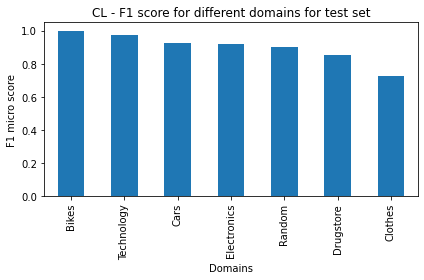

In [14]:
df_domain_f1_overview.plot(x="domain", y="f1_score", kind="bar", legend=None)

plt.ylabel('F1 micro score')
plt.xlabel('Domains')
plt.title('CL - F1 score for different domains for test set')
plt.tight_layout()
plt.savefig(os.path.join(visualization_path, 'CL_F1_domains_test.png'))
plt.show()

# F1 scores for size of train data

In [15]:
df_train_counts = df_train.groupby('cluster_id').count().reset_index()

#join train set and f1 scores for clusters
df_amount_train_f1 = pd.merge(df_f1, df_train_counts, how="left", on="cluster_id")
df_amount_train_f1

,cluster_id,f1_score,name,description
0,1001195,1.000000,20,20
1,1001446,0.769231,7,7
2,1004137,1.000000,4,4
3,1004942,1.000000,2,2
4,1005500,1.000000,4,4
...,...,...,...,...
1405,988749,1.000000,64,64
1406,99153,0.880000,5,5
1407,993500,1.000000,4,4
1408,998602,0.833333,6,6


In [16]:
df_amount_train_f1.describe()

,f1_score,name,description
count,1410.000000,1410.000000,1410.000000
mean,0.899616,7.887234,7.887234
std,0.198141,10.574319,10.574319
min,0.000000,1.000000,1.000000
25%,0.857143,3.000000,3.000000
50%,1.000000,4.000000,4.000000
75%,1.000000,7.000000,7.000000
max,1.000000,116.000000,116.000000


In [17]:
bins = [0, 5, 10, 15, 25, 50, 100, 150]
#create bins for categorization
df_amount_train_f1['binned'] = pd.cut(df_amount_train_f1['name'], bins)
df_amount_train_f1

,cluster_id,f1_score,name,description,binned
0,1001195,1.000000,20,20,"(15, 25]"
1,1001446,0.769231,7,7,"(5, 10]"
2,1004137,1.000000,4,4,"(0, 5]"
3,1004942,1.000000,2,2,"(0, 5]"
4,1005500,1.000000,4,4,"(0, 5]"
...,...,...,...,...,...
1405,988749,1.000000,64,64,"(50, 100]"
1406,99153,0.880000,5,5,"(0, 5]"
1407,993500,1.000000,4,4,"(0, 5]"
1408,998602,0.833333,6,6,"(5, 10]"


In [18]:
df_amount_train_f1_overview = df_amount_train_f1.groupby('binned').mean().drop(columns=['name', 'description']).reset_index()
df_amount_train_f1_overview['binned'] = df_amount_train_f1_overview['binned'].apply(str)
df_amount_train_f1_overview

,binned,f1_score
0,"(0, 5]",0.879013
1,"(5, 10]",0.914036
2,"(10, 15]",0.964770
3,"(15, 25]",0.962978
4,"(25, 50]",0.962567
5,"(50, 100]",0.992294
6,"(100, 150]",0.967480


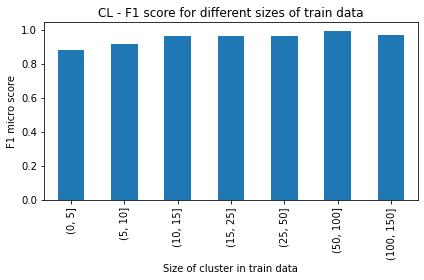

In [19]:
df_amount_train_f1_overview.plot(x="binned", y="f1_score", kind="bar", legend=None)

plt.ylabel('F1 micro score')
plt.xlabel('Size of cluster in train data')
plt.title('CL - F1 score for different sizes of train data')
plt.tight_layout()
plt.savefig(os.path.join(visualization_path, 'CL_F1_train_size.png'))
plt.show()

# F1 scores for description column 

In [20]:
#replace missing values
df_test = df_test.replace(r'^\s*$', np.NaN, regex=True).replace("nan", 0)
df_test['name'] = df_test['name'].fillna(0)
df_test['description'] = df_test['description'].fillna(0)
df_test['cluster_id'] = df_test['cluster_id'].apply(str)
df_test

,name,description,cluster_id
0,WD 2TB Elements Portable External Hard Drive -...,Brand: Western Digital Color: black Features: ...,541658
1,GoPro Head Strap + Quick Clip,0,863679
2,GoPro 3 way grip Arm GoPro,0,251884
3,Akérat Smoothing Exfoliating Cream,<p>Targeted body cream smoothes and retexturiz...,1107309
4,Moisturizing Self-Tanning Silky Gel,"<p>Non-greasy, hydrating self-tanner gives the...",230191
...,...,...,...
10650,Apple Lightning to USB-C Cable (2m),Apple Lightning to USB-C Cable (2m),51314
10651,Apple Lightning to VGA adapter,Apple Lightning to VGA adapter,185147
10652,Apple Lightning to Digital AV adapter,Apple Lightning to Digital AV adapter,32374
10653,Rolex Watches Oyster Perpetual GMT-Master II 1...,Brand : Replica Rolex Collection : Oyster Perp...,800686


### We only look at the description, as the name is only once not given with the description column empty as well. So, it is irrelevant. Around 2800 entities do not have a description.

In [21]:
df_empty_desc_f1 = pd.merge(df_f1, df_test.drop(columns=['name']), how="left", on="cluster_id")
#f1 with description
df_empty_desc_f1['desc_empty'] = 'no'
df_empty_desc_f1.loc[df_empty_desc_f1['description']==0, 'desc_empty'] = 'yes'
df_empty_desc_f1

,cluster_id,f1_score,description,desc_empty
0,1001195,1.000000,An urban e-bike for daily rides to class or re...,no
1,1001195,1.000000,An urban e-bike for daily rides to class or re...,no
2,1001195,1.000000,An urban e-bike for daily rides to class or re...,no
3,1001195,1.000000,An urban e-bike for daily rides to class or re...,no
4,1001195,1.000000,An urban e-bike for daily rides to class or re...,no
...,...,...,...,...
10650,998602,0.833333,Pre-Owned Omega Speedmaster Moonwatch Professi...,no
10651,999135,1.000000,0,yes
10652,999135,1.000000,"Amazfit GTR 42, 3.05 cm (1.2\""), AMOLED, Touch...",no
10653,999135,1.000000,Compra Smartwatch Xiaomi Huami AmazFit GTR Sta...,no


In [22]:
df_empty_desc_f1.groupby('desc_empty').mean().sort_values(by='f1_score', ascending=False)

,f1_score
desc_empty,
yes,0.939563
no,0.930950


# F1 score for amount of tokens in test data

In [23]:
df_test_amt_tokens_f1 = pd.merge(df_f1, df_test, how="left", on=['cluster_id'])
df_test_amt_tokens_f1['amount_tokens'] = df_test_amt_tokens_f1['name'].str.len()
df_test_amt_tokens_f1['amount_tokens'] = df_test_amt_tokens_f1['amount_tokens'].fillna(0).apply(int)
df_test_amt_tokens_f1

,cluster_id,f1_score,name,description,amount_tokens
0,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,13
1,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,13
2,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,13
3,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,13
4,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,13
...,...,...,...,...,...
10650,998602,0.833333,Pre-Owned Omega Speedmaster Moonwatch Professi...,Pre-Owned Omega Speedmaster Moonwatch Professi...,82
10651,999135,1.000000,Xiaomi AMAZFIT GTR 1.2″ Starry Black 42mm – Sm...,0,54
10652,999135,1.000000,"Amazfit GTR 42 AMOLED 3.05 cm (1.2\"") Black GP...","Amazfit GTR 42, 3.05 cm (1.2\""), AMOLED, Touch...",59
10653,999135,1.000000,Smartwatch Xiaomi Huami AmazFit GTR 42mm Starr...,Compra Smartwatch Xiaomi Huami AmazFit GTR Sta...,53


In [24]:
df_test_amt_tokens_f1.describe()

,f1_score,amount_tokens
count,10655.000000,10655.000000
mean,0.933242,46.258564
std,0.168786,33.974657
min,0.000000,0.000000
25%,0.967480,24.000000
50%,1.000000,41.000000
75%,1.000000,61.000000
max,1.000000,2047.000000


In [25]:
bins2 = [0, 5, 10, 15, 25, 50, 100, 500, 2500]
#create bins for categorization
df_test_amt_tokens_f1['binned'] = pd.cut(df_test_amt_tokens_f1['amount_tokens'], bins2)
df_test_amt_tokens_f1

,cluster_id,f1_score,name,description,amount_tokens,binned
0,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,13,"(10, 15]"
1,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,13,"(10, 15]"
2,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,13,"(10, 15]"
3,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,13,"(10, 15]"
4,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,13,"(10, 15]"
...,...,...,...,...,...,...
10650,998602,0.833333,Pre-Owned Omega Speedmaster Moonwatch Professi...,Pre-Owned Omega Speedmaster Moonwatch Professi...,82,"(50, 100]"
10651,999135,1.000000,Xiaomi AMAZFIT GTR 1.2″ Starry Black 42mm – Sm...,0,54,"(50, 100]"
10652,999135,1.000000,"Amazfit GTR 42 AMOLED 3.05 cm (1.2\"") Black GP...","Amazfit GTR 42, 3.05 cm (1.2\""), AMOLED, Touch...",59,"(50, 100]"
10653,999135,1.000000,Smartwatch Xiaomi Huami AmazFit GTR 42mm Starr...,Compra Smartwatch Xiaomi Huami AmazFit GTR Sta...,53,"(50, 100]"


In [26]:
df_test_amt_tokens_f1_overview = df_test_amt_tokens_f1.drop(columns='amount_tokens').groupby('binned').mean()
df_test_amt_tokens_f1_overview

,f1_score
binned,
"(0, 5]",0.933333
"(5, 10]",0.967659
"(10, 15]",0.979064
"(15, 25]",0.960058
"(25, 50]",0.918763
"(50, 100]",0.928256
"(100, 500]",0.890312
"(500, 2500]",0.333333


In [27]:
df_test_amt_tokens_f1_overview = df_test_amt_tokens_f1_overview.reset_index()
df_test_amt_tokens_f1_overview['binned'] = df_test_amt_tokens_f1_overview['binned'].apply(str)
df_test_amt_tokens_f1_overview

,binned,f1_score
0,"(0, 5]",0.933333
1,"(5, 10]",0.967659
2,"(10, 15]",0.979064
3,"(15, 25]",0.960058
4,"(25, 50]",0.918763
5,"(50, 100]",0.928256
6,"(100, 500]",0.890312
7,"(500, 2500]",0.333333


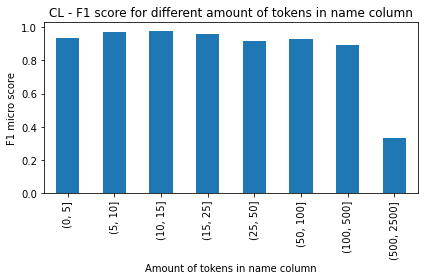

In [28]:
df_test_amt_tokens_f1_overview.plot(x="binned", y="f1_score", kind="bar", legend=None)
    
plt.ylabel('F1 micro score')
plt.xlabel('Amount of tokens in name column')
plt.title('CL - F1 score for different amount of tokens in name column')
plt.tight_layout()
plt.savefig(os.path.join(visualization_path, 'CL_F1_amt_tokens_test.png'))
plt.show()

# Analysis for very good results

In [29]:
df_test_together = pd.merge(df_f1, df_test, how="left", on=['cluster_id'])
df_test_good = df_test_together[df_test_together['f1_score']>0.8]
df_test_good

,cluster_id,f1_score,name,description
0,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...
1,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...
2,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...
3,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...
4,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...
...,...,...,...,...
10650,998602,0.833333,Pre-Owned Omega Speedmaster Moonwatch Professi...,Pre-Owned Omega Speedmaster Moonwatch Professi...
10651,999135,1.000000,Xiaomi AMAZFIT GTR 1.2″ Starry Black 42mm – Sm...,0
10652,999135,1.000000,"Amazfit GTR 42 AMOLED 3.05 cm (1.2\"") Black GP...","Amazfit GTR 42, 3.05 cm (1.2\""), AMOLED, Touch..."
10653,999135,1.000000,Smartwatch Xiaomi Huami AmazFit GTR 42mm Starr...,Compra Smartwatch Xiaomi Huami AmazFit GTR Sta...


In [30]:
df_test_good_cluster_list = list(df_test_good['cluster_id'].drop_duplicates())
len(df_test_good_cluster_list)

1149

# Analysis for very bad results

In [31]:
df_test_bad = df_test_together[df_test_together['f1_score']<0.2]
df_test_bad

,cluster_id,f1_score,name,description
251,1077512,0.0,"Western Digital 4TB 3.5\"" ELEMENTS USB3.0 HARİ...","4TB 3.5\"" ELEMENTS USB3.0 HARİCİ DİSK SİYAH..."
252,1077512,0.0,WD 4TB Elements USB 3.0 3.5&quot; Desktop Hard...,WD 4TB Elements USB 3.0 3.5&quot; Desktop Hard...
705,1188311,0.0,Tissot Stainless Steel T-Sport Men's Watch - T...,The Tissot Chrono XL
706,1188311,0.0,Tissot Chrono XL Classic Men's Watch,The Tissot Chrono XL is one of the largest chr...
707,1188311,0.0,TISSOT CHRONO XL CLASSIC T116.617.11.047.01,Der Tissot Chrono XL ist eine neue Produktline...
...,...,...,...,...
10014,8346889,0.0,7.3 cu. ft. Smart wi-fi Enabled Electric Doubl...,0
10015,8346889,0.0,7.3 cu. ft. Smart wi-fi Enabled Electric Doubl...,0
10016,8346889,0.0,7.3 cu. ft. Smart wi-fi Enabled Electric Doubl...,0
10017,8346889,0.0,7.3 cu. ft. Smart wi-fi Enabled Electric Doubl...,0


In [32]:
df_test_bad_cluster_list = list(df_test_bad['cluster_id'].drop_duplicates())
len(df_test_bad_cluster_list)

31

In [33]:
# write test & train data together with their f1_score into an excel file for manual evaluation of specific clusters
df_train_together = pd.merge(df_f1, df_train, how="left", on=['cluster_id'])
df_train_together['source'] = 'train'
df_test_together['source'] = 'test'

In [34]:
df_all_together = pd.concat([df_train_together, df_test_together], axis=0)
df_all_together.to_excel('df_all_together_with_f1_Contrastive Learning.xlsx')
df_all_together

,cluster_id,f1_score,name,description,source
0,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,train
1,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,train
2,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,train
3,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,train
4,1001195,1.000000,Treadwell Neo,An urban e-bike for daily rides to class or re...,train
...,...,...,...,...,...
10650,998602,0.833333,Pre-Owned Omega Speedmaster Moonwatch Professi...,Pre-Owned Omega Speedmaster Moonwatch Professi...,test
10651,999135,1.000000,Xiaomi AMAZFIT GTR 1.2″ Starry Black 42mm – Sm...,0,test
10652,999135,1.000000,"Amazfit GTR 42 AMOLED 3.05 cm (1.2\"") Black GP...","Amazfit GTR 42, 3.05 cm (1.2\""), AMOLED, Touch...",test
10653,999135,1.000000,Smartwatch Xiaomi Huami AmazFit GTR 42mm Starr...,Compra Smartwatch Xiaomi Huami AmazFit GTR Sta...,test


# Compare overlap & differences between TURL and baseline

In [35]:
# load test & train data together with f1 score for baseline results first
df_all_together_baseline = pd.read_excel('overview_test_train_f1_baseline.xlsx').drop(columns=['Unnamed: 0'])
df_all_together_baseline['cluster_id'] = df_all_together_baseline['cluster_id'].apply(str)
df_all_together_baseline

,name,description,cluster_id,label,source,f1
0,rum body lotion.,a lightweight rum-scented body lotion that abs...,1257145,736,train,0.727273
1,Cisco Catalyst WS-C2960X-24TD-L Stackable Rack...,NaN,758825,542,train,0.833333
2,Laurel Heights Charcoal Crest LH99,Marchand's Interior & Hardware in Gonzales has...,18329550,1201,train,1.000000
3,Laurel Heights Gray Summit LH98,Marchand's Interior & Hardware in Gonzales has...,52605388,1312,train,0.800000
4,Laurel Heights Gray Summit LH98,Marchand's Interior & Hardware in Gonzales has...,41513137,1277,train,0.857143
...,...,...,...,...,...,...
21771,Apple Lightning to USB-C Cable (2m),Apple Lightning to USB-C Cable (2m),51314,70,test,0.800000
21772,Apple Lightning to VGA adapter,Apple Lightning to VGA adapter,185147,184,test,0.666667
21773,Apple Lightning to Digital AV adapter,Apple Lightning to Digital AV adapter,32374,45,test,0.666667
21774,Rolex Watches Oyster Perpetual GMT-Master II 1...,Brand : Replica Rolex Collection : Oyster Perp...,800686,565,test,1.000000


In [36]:
df_good_baseline = df_all_together_baseline[df_all_together_baseline['f1']>0.8]
df_good_cluster_list_baseline = list(df_good_baseline['cluster_id'].drop_duplicates())
len(df_good_cluster_list_baseline)

678

In [37]:
df_bad_baseline = df_all_together_baseline[df_all_together_baseline['f1']<0.2]
df_bad_cluster_list_baseline = list(df_bad_baseline['cluster_id'].drop_duplicates())
len(df_bad_cluster_list_baseline)

110

In [39]:
overlap_good_clusters = list(set(df_test_good_cluster_list).intersection(set(df_good_cluster_list_baseline)))
good_clusters_not_in_CL = list(set(df_good_cluster_list_baseline) - set(df_test_good_cluster_list))
good_clusters_not_in_baseline = list(set(df_test_good_cluster_list) - set(df_good_cluster_list_baseline))
print("The complete overlap between good clusters (with f1 > 0.8) is: {}".format(len(overlap_good_clusters)))
print("Good clusters from baseline which are not good in TURL: {}".format(len(good_clusters_not_in_CL)))
print("Good clusters from TURL which are not good in the baseline: {}".format(len(good_clusters_not_in_baseline)))

The complete overlap between good clusters (with f1 > 0.8) is: 663
Good clusters from baseline which are not good in TURL: 15
Good clusters from TURL which are not good in the baseline: 486


In [40]:
overlap_bad_clusters = list(set(df_test_bad_cluster_list).intersection(set(df_bad_cluster_list_baseline)))
bad_clusters_not_in_CL = list(set(df_bad_cluster_list_baseline) - set(df_test_bad_cluster_list))
bad_clusters_not_in_baseline = list(set(df_test_bad_cluster_list) - set(df_bad_cluster_list_baseline))
print("The complete overlap between bad clusters (with f1 < 0.2) is: {}".format(len(overlap_bad_clusters)))
print("Bad clusters from baseline which are not bad in CL: {}".format(len(bad_clusters_not_in_CL)))
print("Bad clusters from CL which are not bad in the baseline: {}".format(len(bad_clusters_not_in_baseline)))

The complete overlap between bad clusters (with f1 < 0.2) is: 24
Bad clusters from baseline which are not bad in CL: 86
Bad clusters from CL which are not bad in the baseline: 7


In [41]:
overlap_info_df = pd.DataFrame()
overlap_info_df['cluster_id'] = df_all_together_baseline['cluster_id'].drop_duplicates()
overlap_info_df['overlap_info'] = 'none'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(overlap_good_clusters), 'overlap_info'] = 'overlap_good_clusters'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(good_clusters_not_in_CL), 'overlap_info'] = 'good_clusters_not_in_CL'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(good_clusters_not_in_baseline), 'overlap_info'] = 'good_clusters_not_in_baseline'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(overlap_bad_clusters), 'overlap_info'] = 'overlap_bad_clusters'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(bad_clusters_not_in_CL), 'overlap_info'] = 'bad_clusters_not_in_CL'
overlap_info_df.loc[overlap_info_df['cluster_id'].isin(bad_clusters_not_in_baseline), 'overlap_info'] = 'bad_clusters_not_in_baseline'
overlap_info_df.to_excel('overlap_info_Contrastive Learning.xlsx')
overlap_info_df

,cluster_id,overlap_info
0,1257145,good_clusters_not_in_baseline
1,758825,overlap_good_clusters
2,18329550,overlap_good_clusters
3,52605388,good_clusters_not_in_baseline
4,41513137,overlap_good_clusters
...,...,...
9623,1220634,good_clusters_not_in_baseline
9728,2148094,good_clusters_not_in_baseline
10052,107546,bad_clusters_not_in_CL
10577,1620691,none


# Compare attribute mistakes for same list as with baseline

In [42]:
attribute_mistakes_df = pd.read_csv('cluster_attribute_mistakes.csv').drop(columns='Unnamed: 0')
attribute_mistakes_df['cluster_id'] = attribute_mistakes_df['cluster_id'].apply(str)
attribute_mistakes_cluster_list = list(attribute_mistakes_df['cluster_id'])
res_attribute_mistakes_df = df_f1[df_f1['cluster_id'].isin(attribute_mistakes_cluster_list)]
attribute_mistakes_f1_df = pd.merge(res_attribute_mistakes_df, attribute_mistakes_df, how="left", on=["cluster_id"])
attribute_mistakes_f1_df

,cluster_id,f1_score,label
0,1001446,0.769231,648
1,1006110,1.000000,652
2,1008575,1.000000,655
3,101187,0.857143,112
4,101291,0.800000,113
...,...,...,...
510,976498,1.000000,638
511,980563,1.000000,639
512,983488,1.000000,641
513,99153,0.880000,110


In [43]:
attribute_mistakes_f1_df.drop(columns='label').describe()

,f1_score
count,515.000000
mean,0.845863
std,0.231092
min,0.000000
25%,0.800000
50%,0.933333
75%,1.000000
max,1.000000


In [46]:
df_all_together[df_all_together['cluster_id'].isin(['53163'])]

,cluster_id,f1_score,name,description,source
7903,53163,0.909091,MEMORIA MICRO SD KINGSTON CLASE 10 64GB,La tarjeta microSD Canvas SelectT de Kingston ...,train
7904,53163,0.909091,64GB Canvas Select UHS-I microSDXC Memory Card...,64GB Canvas Select UHS-I microSDXC Memory Card...,train
7905,53163,0.909091,Tarjeta MicroSD C10 64 Gb Kingston,<p></p><p>La tarjeta MicroSD esta diseñada y p...,train
7906,53163,0.909091,64GB MICROSDXC CANVAS SELECT 80R CL 10 UHS-I C...,nan,train
7907,53163,0.909091,Kingston 64GB Canvas Select MicroSD Hafıza Kartı,nan,train
7567,53163,0.909091,KINGSTON SDCS-64 64 GB SDHC 80 MB Class 10 SD-...,Yapı SDHC Kapasite 64 GB Aktarım Hızı 80 MB/s ...,test
7568,53163,0.909091,Cart�o de mem�ria micro SD Kingston 64Gb XC1 c...,None,test
7569,53163,0.909091,Kingston Canvas Select 64GB MicroSDXC card 80MB/s,Bring your HD videos to life.Kingston’s Canvas...,test
7570,53163,0.909091,Cartão Micro SD Kingston SDCS/64GB 64 GB,Se gosta das últimas tendências de tecnologia ...,test
7571,53163,0.909091,Kingston Micro SD 64GB,Kingston Micro SDHC UHS-I Card with Adapter 64...,test


In [47]:
df_all_together_baseline[df_all_together_baseline['cluster_id'].isin(['53163'])]

,name,description,cluster_id,label,source,f1
2404,MEMORIA MICRO SD KINGSTON CLASE 10 64GB,La tarjeta microSD Canvas SelectT de Kingston ...,53163,71,train,0.363636
4409,64GB Canvas Select UHS-I microSDXC Memory Card...,64GB Canvas Select UHS-I microSDXC Memory Card...,53163,71,train,0.363636
4833,Tarjeta MicroSD C10 64 Gb Kingston,<p></p><p>La tarjeta MicroSD esta diseñada y p...,53163,71,train,0.363636
6410,64GB MICROSDXC CANVAS SELECT 80R CL 10 UHS-I C...,NaN,53163,71,train,0.363636
7125,Kingston 64GB Canvas Select MicroSD Hafıza Kartı,NaN,53163,71,train,0.363636
13789,KINGSTON SDCS-64 64 GB SDHC 80 MB Class 10 SD-...,Yapı SDHC Kapasite 64 GB Aktarım Hızı 80 MB/s ...,53163,71,test,0.363636
15505,Cart�o de mem�ria micro SD Kingston 64Gb XC1 c...,None,53163,71,test,0.363636
18933,Kingston Canvas Select 64GB MicroSDXC card 80MB/s,Bring your HD videos to life.Kingston’s Canvas...,53163,71,test,0.363636
19214,Cartão Micro SD Kingston SDCS/64GB 64 GB,Se gosta das últimas tendências de tecnologia ...,53163,71,test,0.363636
19662,Kingston Micro SD 64GB,Kingston Micro SDHC UHS-I Card with Adapter 64...,53163,71,test,0.363636
